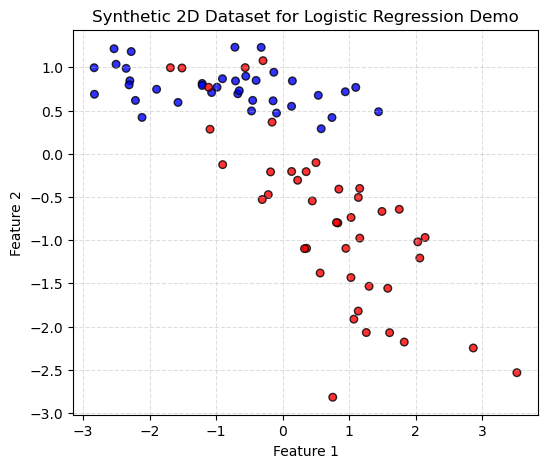

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate the same dataset used later
X, y = make_classification(
    n_samples=80,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=7
)

# Plot dataset
plt.figure(figsize=(6, 5))
plt.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap="bwr", edgecolor="k", s=30, alpha=0.8
)
plt.title("Synthetic 2D Dataset for Logistic Regression Demo")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

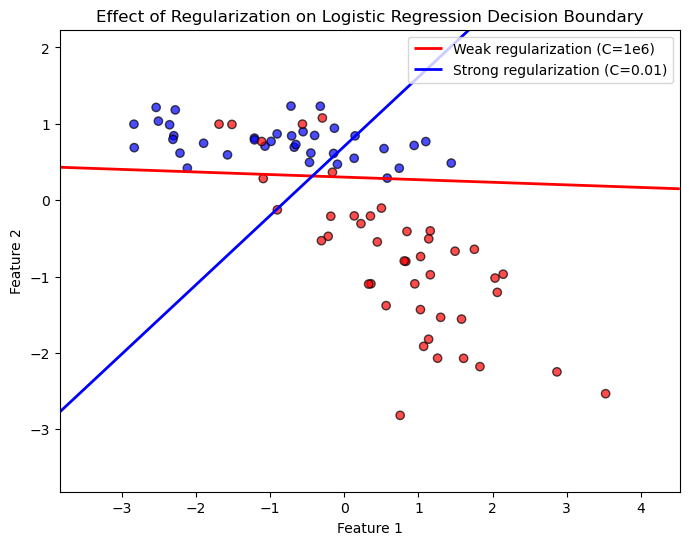

Coefficients (C=1e6): [[-0.13048172 -3.87061174]]
Coefficients (C=0.01): [[ 0.19847188 -0.21883192]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1 -  Create a small 2D dataset
X, y = make_classification(
    n_samples=80,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=7
)

# 2 - Fit two logistic regression models with different regularization strengths
clf_weak = LogisticRegression(C=1e6, solver="lbfgs")   # almost no regularization
clf_strong = LogisticRegression(C=0.01, solver="lbfgs") # strong regularization
clf_weak.fit(X, y)
clf_strong.fit(X, y)

# 3 - Create a grid for decision boundaries
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
)
Z_weak = clf_weak.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_strong = clf_strong.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot data and decision boundaries
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", alpha=0.7)

# Contours for the two models
contour_weak = plt.contour(xx, yy, Z_weak, levels=[0], colors='red', linewidths=2)
contour_strong = plt.contour(xx, yy, Z_strong, levels=[0], colors='blue', linewidths=2)

# Get legend handles
weak_handle, _ = contour_weak.legend_elements()
strong_handle, _ = contour_strong.legend_elements()

plt.legend(
    [weak_handle[0], strong_handle[0]],
    ["Weak regularization (C=1e6)", "Strong regularization (C=0.01)"]
)

plt.title("Effect of Regularization on Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Compare coefficients
print("Coefficients (C=1e6):", clf_weak.coef_)
print("Coefficients (C=0.01):", clf_strong.coef_)

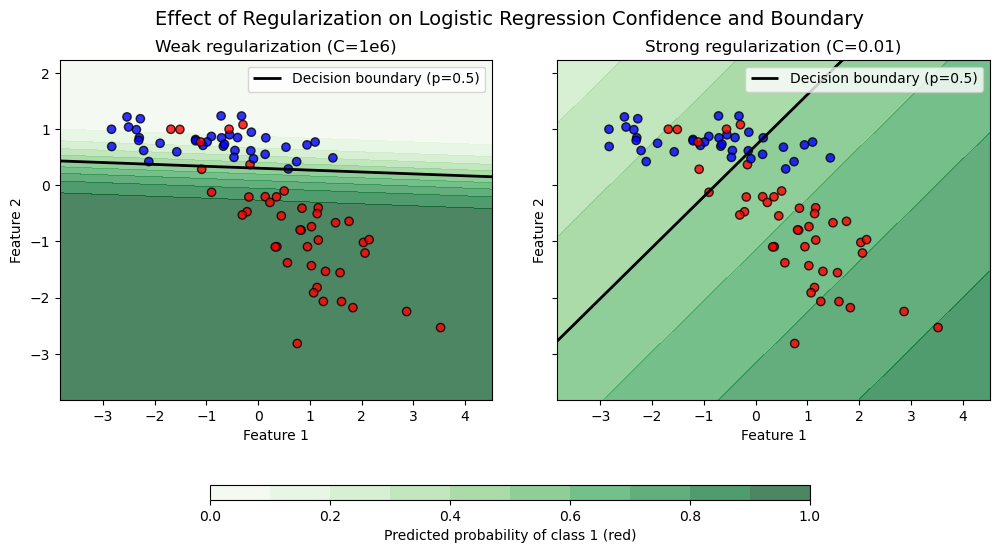

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1️⃣ Dataset
X, y = make_classification(
    n_samples=80,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=7
)

# 2️⃣ Models
clf_weak = LogisticRegression(C=1e6, solver="lbfgs")
clf_strong = LogisticRegression(C=0.01, solver="lbfgs")
clf_weak.fit(X, y)
clf_strong.fit(X, y)

# 3️⃣ Grid
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
prob_weak = clf_weak.predict_proba(grid)[:, 1].reshape(xx.shape)
prob_strong = clf_strong.predict_proba(grid)[:, 1].reshape(xx.shape)

# 4️⃣ Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

for ax, prob, title in [
    (axes[0], prob_weak, "Weak regularization (C=1e6)"),
    (axes[1], prob_strong, "Strong regularization (C=0.01)")
]:
    contourf = ax.contourf(xx, yy, prob, levels=np.linspace(0, 1, 11),
                           cmap="Greens", alpha=0.7)
    contour = ax.contour(xx, yy, prob, levels=[0.5], colors='black', linewidths=2)
    handle, _ = contour.legend_elements()
    ax.legend([handle[0]], ["Decision boundary (p=0.5)"], loc="upper right")

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# 5️⃣ Adjust layout to make room for the colorbar
plt.subplots_adjust(bottom=0.20, top=0.88, wspace=0.15)

# 6️⃣ Dedicated colorbar axis below the plots
cbar_ax = fig.add_axes([0.25, 0.0, 0.5, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(contourf, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Predicted probability of class 1 (red)")

# 7️⃣ Title and show
fig.suptitle("Effect of Regularization on Logistic Regression Confidence and Boundary", fontsize=14)
plt.show()
